In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from netCDF4 import Dataset,num2date

In [4]:
f = Dataset('era5_1979_2022_north_american_weather_regimes.nc','r')
time=num2date(f.variables['time'][:],f.variables['time'].units,f.variables['time'].calendar)
daily_regime=f.variables['regime'][:]
iwr = f.variables['WRI'][:]
f.close()

In [68]:
def IWR_plot(iwr,regimes,time_plot,regcols,regnames,tickfreq):
    markers=['D','X','s','o','']
    ## time array for plotting
    
    x=np.arange(len(time_plot))
    ## figure
    fig, ax = plt.subplots(figsize=(6,5),tight_layout=True)
    for r in range(iwr.shape[0]-1):
        plt.plot(x,iwr[r],color=regcols[r],lw=0.5)    
        plt.plot(x,np.ma.masked_where(regimes!=r,iwr[r]),color=regcols[r],lw=2,label=regnames[r],marker=markers[r])    
        
    plt.legend(loc='lower center',ncol=2)
    plt.grid(linestyle=':')
    plt.axhline(0,color='k',linewidth=1)
    
    plt.ylim(-3,3)
    plt.ylabel("Weather regime index ($\sigma$)",weight="bold")
    xticks = []
    xticklabs = []
    
    for t in range(len(time_plot)):
        if tickfreq=="mon":
            tstr = np.array([datetime.strftime(t,"%b %Y") for t in time_plot])
            if time_plot[t].day==1:
                xticklabs.append(tstr[t])
                xticks.append(x[t])
        if tickfreq=="week":
            tstr = np.array([datetime.strftime(t,"%Y-%m-%d") for t in time_plot])
            xticklabs=tstr[::5]
            xticks=x[::5]
        

    plt.xticks(xticks,xticklabs,rotation=90)
    plt.xlim(x.min(),x.max())
    plt.axhline(4,color='k',lw=1)
    plt.title(str(datetime.strftime(time_plot[0],"%-d %B %Y"))+"$-$"+str(datetime.strftime(time_plot[-1],"%d %B %Y")),weight="bold")
    # for r in range(5):
    #     plt.plot(np.ma.masked_where(regimes!=r,x),np.full(len(x),4.1+(r/10)),marker='s',color=regcols[r],markersize=5,linestyle='none')
    # for d in range(len(regimes)):        
    #     plt.scatter(x[d],iwr[int(regimes[d]),d],s=20,marker=markers[int(regimes[d])],color=regcols[int(regimes[d])])

    return fig

In [69]:
regnames = ['Pacific Trough','Pacific Ridge','Alaskan Ridge','Greenland High','Neutral']
regcols = ['purple','cornflowerblue','orange','tomato','gray']

2021


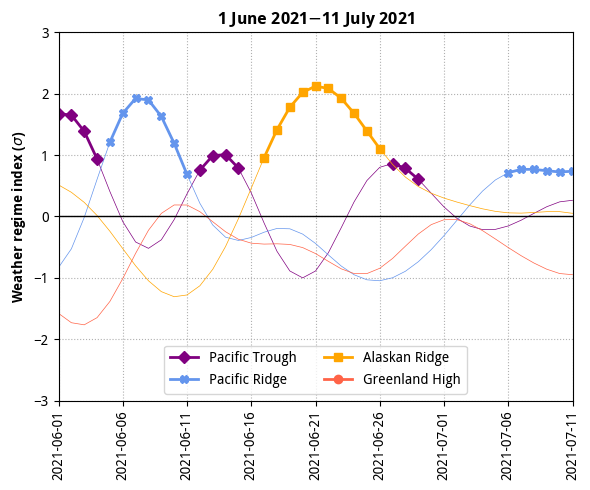

In [71]:
regtime = np.array([datetime(t.year,t.month,t.day) for t in time.flatten()])

date_start = np.where(time==datetime(2021,6,1))[0][0]
date_end = np.where(time==datetime(2021,7,11))[0][0]
time_plot = regtime[date_start:date_end+1]

fig = IWR_plot(iwr[:,date_start:date_end+1], daily_regime[date_start:date_end+1],time_plot,regcols,regnames,"week")
